In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
order=ctrl.Antecedent(np.arange(0,11,1),'order')
urgency=ctrl.Antecedent(np.arange(0,11,1),'urgency')
load=ctrl.Antecedent(np.arange(0,11,1),'load')
traffic=ctrl.Antecedent(np.arange(0,11,1),'traffic')
profit=ctrl.Antecedent(np.arange(0,11,1),'profit')
num=ctrl.Consequent(np.arange(0,101,1),'num')
priority=ctrl.Consequent(np.arange(0,11,1),'priority')

In [ ]:
order['low']=fuzz.trimf(order.universe,[0,2,4])
order['medium']=fuzz.trimf(order.universe,[3,5,7])
order['high']=fuzz.trimf(order.universe,[6,8,10])

In [ ]:
urgency['low']=fuzz.trimf(urgency.universe,[0,2,4])
urgency['medium']=fuzz.trimf(urgency.universe,[3,5,7])
urgency['high']=fuzz.trimf(urgency.universe,[6,8,10])

In [ ]:
load['low']=fuzz.trimf(load.universe,[0,2,4])
load['medium']=fuzz.trimf(load.universe,[3,5,7])
load['high']=fuzz.trimf(load.universe,[6,8,10])

In [ ]:
traffic['low']=fuzz.trimf(traffic.universe,[0,2,4])
traffic['medium']=fuzz.trimf(traffic.universe,[3,5,7])
traffic['high']=fuzz.trimf(traffic.universe,[6,8,10])

In [ ]:
profit['low']=fuzz.trimf(profit.universe,[0,2,4])
profit['medium']=fuzz.trimf(profit.universe,[3,5,7])
profit['high']=fuzz.trimf(profit.universe,[6,8,10])

In [ ]:
num['low']=fuzz.trimf(num.universe,[0,25,40])
num['medium']=fuzz.trimf(num.universe,[30,55,70])
num['high']=fuzz.trimf(num.universe,[65,88,100])

In [ ]:
priority['low']=fuzz.trimf(priority.universe,[0,2,4])
priority['medium']=fuzz.trimf(priority.universe,[3,5,7])
priority['high']=fuzz.trimf(priority.universe,[6,8,10])

In [ ]:
rule1=ctrl.Rule(order['high']& load['low']& traffic['low'], num['high'])
rule2=ctrl.Rule(order['medium']& traffic['high']& urgency['medium'], num['medium'])
rule3=ctrl.Rule(load['high']& order['high']& profit['medium'], num['medium'])
rule4=ctrl.Rule(order['low']& urgency['high']& traffic['medium'], num['medium'])
rule5=ctrl.Rule(profit['high']& urgency['high']& traffic['high'], num['medium'])
rule6=ctrl.Rule(urgency['high']& profit['high'], priority['high'])
rule7=ctrl.Rule(urgency['medium']& traffic['medium'], priority['medium'])
rule8=ctrl.Rule(urgency['low']& order['high']& profit['low'], priority['low'])


so luong don hang can ket hop 51.1111111111111


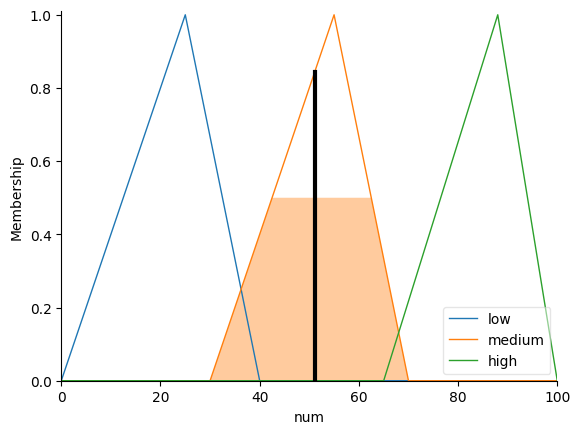

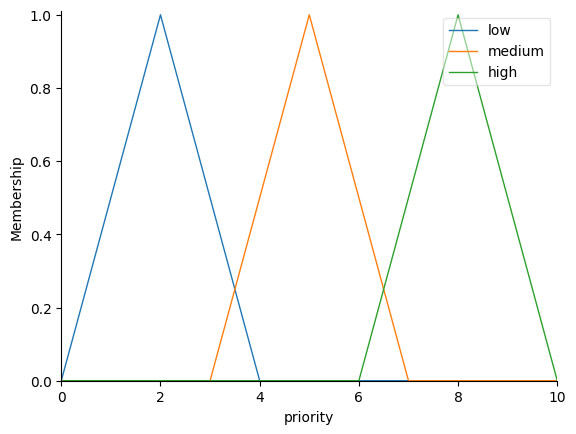

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
system=ctrl.ControlSystemSimulation(control_system)
system.input['order']=6
system.input['urgency']=4
system.input['load']=9
system.input['traffic']=9
system.input['profit']=6
system.compute()
print('so luong don hang can ket hop',system.output['num'])
print('uu tien giao hang',system.output['priority'])
num.view(sim=system)
priority.view(sim=system)